In [89]:
# Daniel Bandala @ mar 2022
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

# Sampling with unknown probability density
In statistics, quality assurance, and survey methodology, sampling is the selection of a subset of individuals from within a statistical population to estimate characteristics of the whole population. Statisticians attempt to collect samples that are representative of the population in question.

In [51]:
def generate_data(proportion=30,points=1000000):
    data = np.zeros(points,dtype=np.uint8)
    for i in range(points):
        data[i] = 1 if i<int(proportion*points/100) else 0
    np.random.shuffle(data)
    return data

In [58]:
def get_sample(input_data,size=10):
    in_array = np.empty(0)
    data = np.zeros(size,dtype=np.uint8)
    for i in range(size):
        idx = np.random.randint(0,len(input_data))
        while idx in in_array:
            idx = np.random.randint(0,len(input_data))
        in_array = np.append(in_array,idx)
        data[i] = input_data[idx]
    return data

In [97]:
def plot_samples(data,sizes):
    w_distance = np.zeros(len(sizes))
    plt.figure(figsize=(24,8))
    for i in range(len(sizes)):
        sample = get_sample(random_data,sizes[i])
        w_distance[i] = wasserstein_distance(data,sample)
        # graph global population histogram
        plt.subplot(2, int(len(sizes)/2)+1,i+1)
        plt.hist(sample)
        plt.title("Sample "+str(sizes[i])+" items")
    plt.suptitle("Histogram multiple sample size")
    plt.show()
    for i in range(len(sizes)):
        print("Sample ",sizes[i]," Wasserstein distance: ",w_distance[i])

In [52]:
random_data = generate_data()

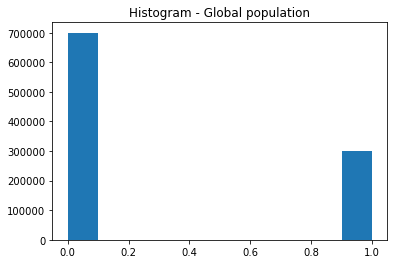

In [57]:
# graph global population histogram
plt.hist(random_data) 
plt.title("Histogram - Global population") 
plt.show()

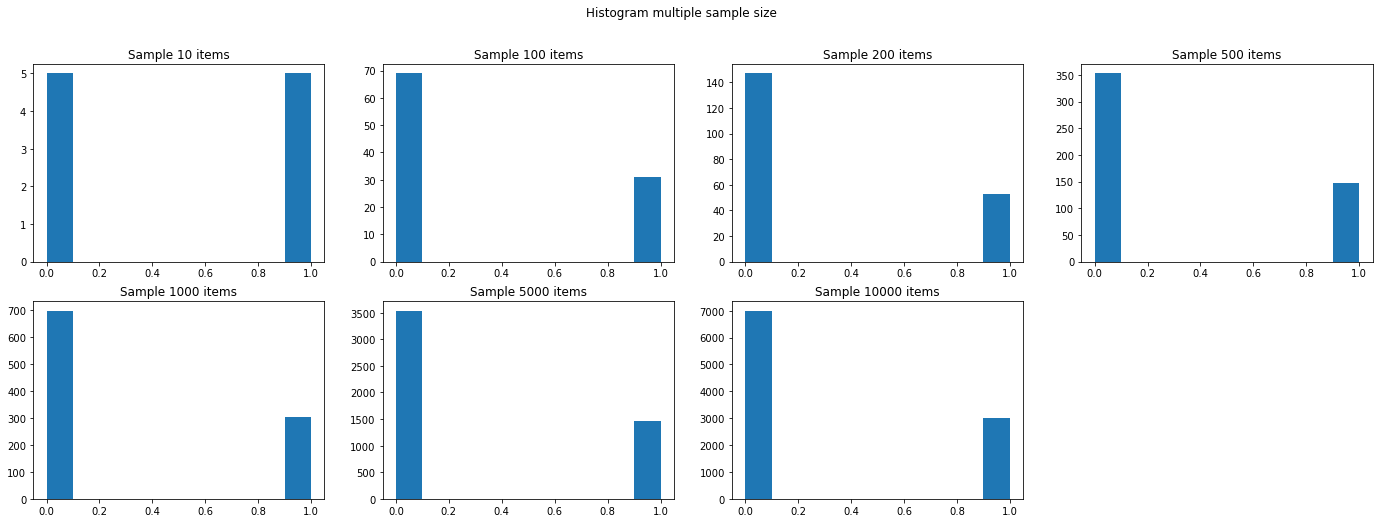

Sample  10  Wasserstein distance:  0.19999999999999996
Sample  100  Wasserstein distance:  0.010000000000000009
Sample  200  Wasserstein distance:  0.03500000000000003
Sample  500  Wasserstein distance:  0.006000000000000005
Sample  1000  Wasserstein distance:  0.0030000000000000027
Sample  5000  Wasserstein distance:  0.008200000000000096
Sample  10000  Wasserstein distance:  0.000300000000000078


In [99]:
plot_samples(random_data,[10,100,200,500,1000,5000,10000])